1. Veri okuma

In [1]:
import pandas as pd

# PCA ile boyutu indirgenmiş veriler
X_train_pca = pd.read_csv("dataset/train_pca.csv")
y_train_pca = pd.read_csv("dataset/y_train_pca.csv").values.ravel()

X_test_pca = pd.read_csv("dataset/test_pca.csv")
y_test_pca = pd.read_csv("dataset/y_test_pca.csv").values.ravel()

print("PCA sonrası eğitim verisi:", X_train_pca.shape)
print("PCA sonrası test verisi:", X_test_pca.shape)

PCA sonrası eğitim verisi: (398040, 12)
PCA sonrası test verisi: (85443, 12)


2. ANN modeli oluşturma

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Model tanımı (input boyutunu PCA sonrası değiştiriyoruz)
model_pca = Sequential()
model_pca.add(Dense(32, input_dim=X_train_pca.shape[1], activation='relu'))
model_pca.add(Dropout(0.2))
model_pca.add(Dense(16, activation='relu'))
model_pca.add(Dropout(0.2))
model_pca.add(Dense(1, activation='sigmoid'))

# Derleme
model_pca.compile(optimizer=Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-03-24 12:18:37.250198: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2025-03-24 12:18:37.250228: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 24.00 GB
2025-03-24 12:18:37.250232: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 8.00 GB
2025-03-24 12:18:37.250248: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-03-24 12:18:37.250259: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow 

3. Model Eğitimi

In [3]:
history_pca = model_pca.fit(X_train_pca, y_train_pca,
                            epochs=10,
                            batch_size=2048,
                            validation_data=(X_test_pca, y_test_pca),
                            verbose=1)

Epoch 1/10


2025-03-24 12:18:50.048455: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


195/195 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.8163 - loss: 0.8190 - val_accuracy: 0.9964 - val_loss: 0.0214
Epoch 2/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8906 - loss: 0.4296 - val_accuracy: 0.9881 - val_loss: 0.0740
Epoch 3/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9242 - loss: 0.2270 - val_accuracy: 0.9800 - val_loss: 0.0957
Epoch 4/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9377 - loss: 0.1800 - val_accuracy: 0.9773 - val_loss: 0.1069
Epoch 5/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9408 - loss: 0.1730 - val_accuracy: 0.9758 - val_loss: 0.1118
Epoch 6/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9417 - loss: 0.1698 - val_accuracy: 0.9747 - val_loss: 0.1157
Epoch 7/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9418 - loss: 0.1690 - val_accuracy: 0.9740 - val_loss: 0.1181
Epoch 8/10
195/195 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9416 - loss: 0.1693 - val_accuracy: 0.9750 - val

4. ANN modeli eğitimi ve değerlendirme

2671/2671 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


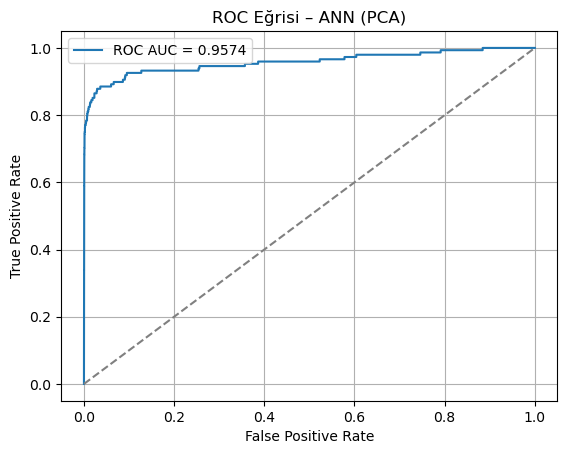

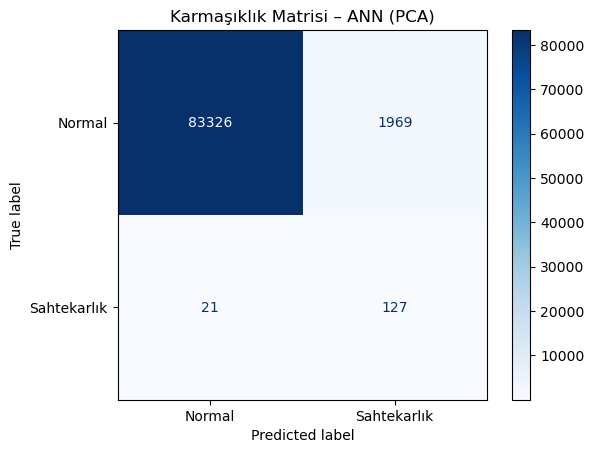

Doğruluk (Accuracy):     0.9767
Kesinlik (Precision):    0.0606
Duyarlılık (Recall):     0.8581
Özgüllük (Specificity):  0.9769
F1 Skoru:                0.1132
ROC AUC Skoru:           0.9574


In [4]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Tahmin
y_pred_proba_pca = model_pca.predict(X_test_pca).ravel()
y_pred_pca = (y_pred_proba_pca >= 0.5).astype(int)

# ROC Eğrisi
fpr, tpr, thresholds = roc_curve(y_test_pca, y_pred_proba_pca)
roc_auc_pca = roc_auc_score(y_test_pca, y_pred_proba_pca)

plt.figure()
plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc_pca:.4f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Eğrisi – ANN (PCA)")
plt.legend()
plt.grid()
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test_pca, y_pred_pca)
ConfusionMatrixDisplay(cm, display_labels=["Normal", "Sahtekarlık"]).plot(cmap="Blues")
plt.title("Karmaşıklık Matrisi – ANN (PCA)")
plt.show()

# Performans metrikleri
accuracy = accuracy_score(y_test_pca, y_pred_pca)
precision = precision_score(y_test_pca, y_pred_pca)
recall = recall_score(y_test_pca, y_pred_pca)
f1 = f1_score(y_test_pca, y_pred_pca)
specificity = cm[0,0] / (cm[0,0] + cm[0,1])

print(f"Doğruluk (Accuracy):     {accuracy:.4f}")
print(f"Kesinlik (Precision):    {precision:.4f}")
print(f"Duyarlılık (Recall):     {recall:.4f}")
print(f"Özgüllük (Specificity):  {specificity:.4f}")
print(f"F1 Skoru:                {f1:.4f}")
print(f"ROC AUC Skoru:           {roc_auc_pca:.4f}")

## Yapay Sinir Ağı (ANN) Modelleri – PCA Öncesi ve Sonrası Performans Karşılaştırması

Yapay Sinir Ağı (ANN) modeli hem orijinal öznitelikler kullanılarak hem de PCA (Principal Component Analysis) yöntemiyle boyutu azaltılmış veri setiyle eğitilmiştir. Aşağıdaki tabloda bu iki modelin performans metrikleri karşılaştırmalı olarak sunulmuştur:

| Metrik              | ANN (Orijinal) | ANN + PCA     |
|---------------------|----------------|---------------|
| Doğruluk (Accuracy) | 0.9811         | 0.9767        |
| Kesinlik (Precision)| 0.0743         | 0.0606        |
| Duyarlılık (Recall) | 0.8649         | 0.8581        |
| Özgüllük (Specificity) | 0.9813     | 0.9769        |
| F1 Skoru            | 0.1368         | 0.1132        |
| ROC AUC Skoru       | 0.9655         | 0.9574        |

### Yorum:
- **ANN (orijinal özniteliklerle)** eğitildiğinde en yüksek başarıyı göstermiştir. Özellikle **Precision, F1 skoru ve ROC AUC** açısından PCA’lı modele göre daha iyi performans sergilemiştir.
- PCA sonrası modelde, **doğruluk ve özgüllük gibi metriklerde küçük düşüşler** görülmüştür. Ancak **Recall değeri** hala yüksek seviyededir ve bu, modelin sahtekarlıkları doğru bir şekilde yakalamaya devam ettiğini gösterir.
- PCA'nın uygulanması model boyutunu azaltarak eğitim süresinde ve hesaplama maliyetinde avantaj sağlayabilir; ancak bu örnekte **hafif bir performans kaybı** olmuştur.
- Bu karşılaştırma, PCA’nın bazı durumlarda modele katkı sağlasa da, her zaman daha iyi sonuçlar üretmeyebileceğini göstermektedir.